Gewogen afstand dist_w(x,y) = 2.449489742783178
Euclidische afstand ||y-x||2 = 1.7320508075688772
Check via S: 2.449489742783178
verschil = 0.0
verschil = 0.0
verschil = 0.0


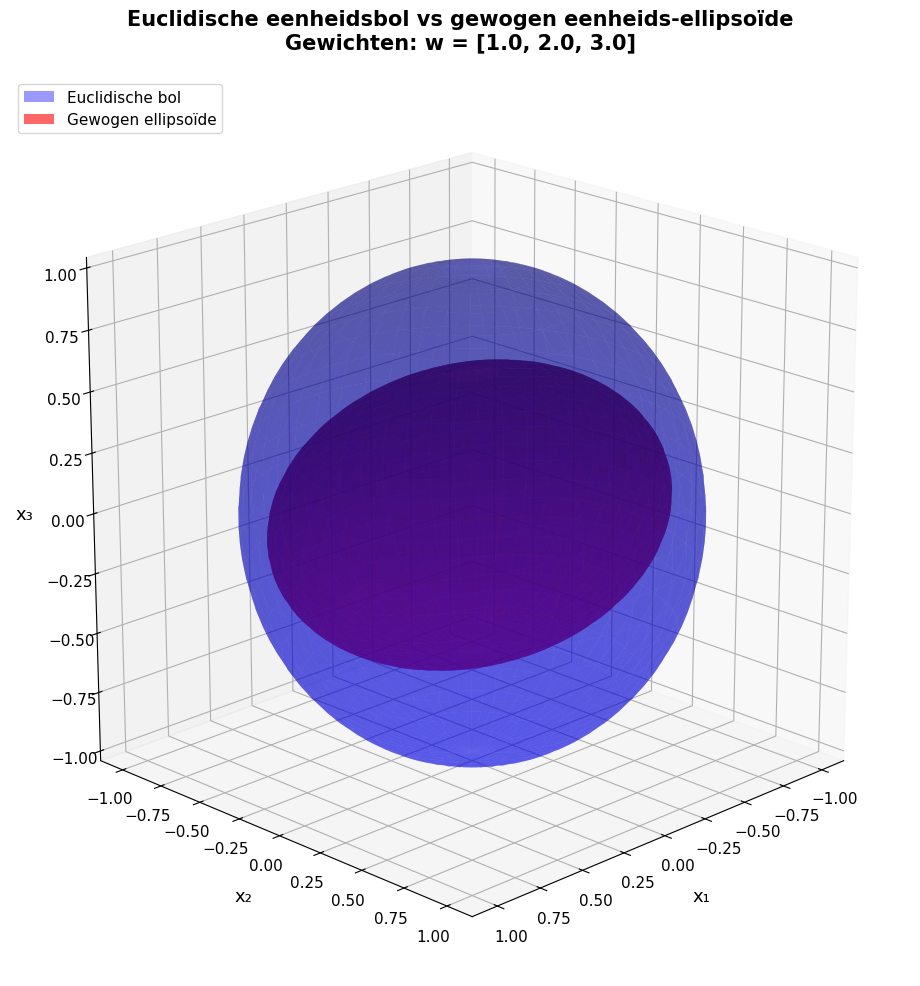

/var/folders/9s/8sbwt7bs0m15y39npx_sphrc0000gn/T/ipykernel_22958/3965000491.py:118: UserWarning: The following kwargs were not used by contour: 'label'
  contour1 = ax.contour(X1, X2, D_euclid, levels=levels, colors='blue',
/var/folders/9s/8sbwt7bs0m15y39npx_sphrc0000gn/T/ipykernel_22958/3965000491.py:120: UserWarning: The following kwargs were not used by contour: 'label'
  contour2 = ax.contour(X1, X2, D_weighted, levels=levels, colors='red',


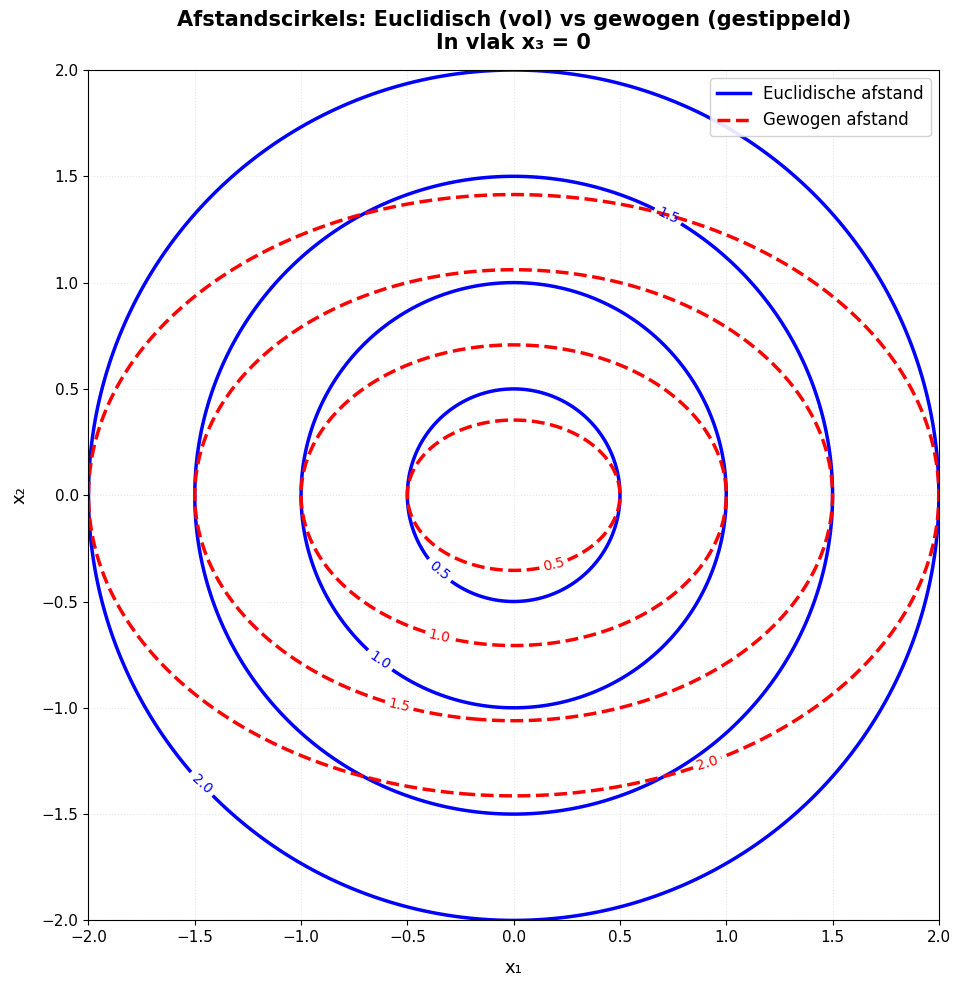

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Verhoog standaard figuurgrootte en fontgrootte
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 11

# ----------------------------
# (1) Definieer gewogen inproduct + norm + afstand
# ----------------------------
w = np.array([1.0, 2.0, 3.0])          # gewichten voor x1,x2,x3
S = np.diag(np.sqrt(w))               # schaalmatrix diag(1, sqrt(2), sqrt(3))

def inner(x, y, w=w):
    """Gewogen inproduct <x,y> = x1y1 + 2x2y2 + 3x3y3."""
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    return np.sum(w * x * y)

def norm_w(x):
    """Geïnduceerde norm ||x|| = sqrt(<x,x>)."""
    return np.sqrt(inner(x, x))

def dist_w(x, y):
    """Afstand dist(x,y) = ||y-x|| (met de gewogen norm)."""
    return norm_w(np.asarray(y) - np.asarray(x))


# ----------------------------
# (2) Klein numeriek voorbeeld
# ----------------------------
x = np.array([0.0, 0.0, 0.0])
y = np.array([1.0, 1.0, 1.0])

print("Gewogen afstand dist_w(x,y) =", dist_w(x, y))
print("Euclidische afstand ||y-x||2 =", np.linalg.norm(y - x))

# Check de 'vervormings'-intuïtie: dist_w(x,y) = || S (y-x) ||_2
print("Check via S:", np.linalg.norm(S @ (y - x)))


# ----------------------------
# (3) Extra check: random punten -> beide formules gelijk
# ----------------------------
rng = np.random.default_rng(0)
for _ in range(3):
    a = rng.normal(size=3)
    b = rng.normal(size=3)
    d1 = dist_w(a, b)
    d2 = np.linalg.norm(S @ (b - a))
    print("verschil =", abs(d1 - d2))


# ----------------------------
# (4) Visualisatie: sphere (Euclidisch) vs ellipsoïde (gewogen afstand = 1)
#     Gewogen 'eenheidsbol': x1^2 + 2 x2^2 + 3 x3^2 = 1  -> ellipsoïde
# ----------------------------
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 50)
U, V = np.meshgrid(u, v)

# Euclidische eenheidsbol
Xs = np.cos(U) * np.sin(V)
Ys = np.sin(U) * np.sin(V)
Zs = np.cos(V)

# Gewogen eenheids-"bol" (ellipsoïde): a=1, b=1/sqrt(2), c=1/sqrt(3)
a, b, c = 1.0, 1/np.sqrt(2.0), 1/np.sqrt(3.0)
Xe = a * np.cos(U) * np.sin(V)
Ye = b * np.sin(U) * np.sin(V)
Ze = c * np.cos(V)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")

# Verbeter visualisatie
surf1 = ax.plot_surface(Xs, Ys, Zs, rstride=2, cstride=2, alpha=0.4, 
                        color='blue', label='Euclidische bol (r=1)')
surf2 = ax.plot_surface(Xe, Ye, Ze, rstride=2, cstride=2, alpha=0.6, 
                        color='red', label='Gewogen ellipsoïde (dist=1)')

ax.set_title("Euclidische eenheidsbol vs gewogen eenheids-ellipsoïde\n" + 
             f"Gewichten: w = [{w[0]}, {w[1]}, {w[2]}]", 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xlabel("x₁", fontsize=13, labelpad=10)
ax.set_ylabel("x₂", fontsize=13, labelpad=10)
ax.set_zlabel("x₃", fontsize=13, labelpad=10)
ax.set_box_aspect([1, 1, 1])

# Voeg legenda toe (handmatig voor 3D plot)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', alpha=0.4, label='Euclidische bol'),
                   Patch(facecolor='red', alpha=0.6, label='Gewogen ellipsoïde')]
ax.legend(handles=legend_elements, loc='upper left', fontsize=11)

ax.view_init(elev=20, azim=45)
plt.tight_layout()
plt.show()


# ----------------------------
# (5) Bonus: "afstandscirkels" in het vlak x3=0 (contourplot)
#     dist_w((0,0,0), (x1,x2,0)) = sqrt(x1^2 + 2 x2^2)
# ----------------------------
x1 = np.linspace(-2, 2, 500)
x2 = np.linspace(-2, 2, 500)
X1, X2 = np.meshgrid(x1, x2)

D_weighted = np.sqrt(X1**2 + 2*(X2**2))
D_euclid   = np.sqrt(X1**2 + X2**2)

fig, ax = plt.subplots(figsize=(12, 10))

levels = [0.5, 1.0, 1.5, 2.0]
contour1 = ax.contour(X1, X2, D_euclid, levels=levels, colors='blue', 
                       linewidths=2.5, label='Euclidisch')
contour2 = ax.contour(X1, X2, D_weighted, levels=levels, colors='red', 
                       linewidths=2.5, linestyles='--', label='Gewogen')

# Voeg labels aan contourlijnen toe
ax.clabel(contour1, inline=True, fontsize=10, fmt='%.1f')
ax.clabel(contour2, inline=True, fontsize=10, fmt='%.1f')

ax.set_aspect("equal", adjustable="box")
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)
ax.set_title("Afstandscirkels: Euclidisch (vol) vs gewogen (gestippeld)\nIn vlak x₃ = 0", 
             fontsize=15, fontweight='bold', pad=15)
ax.set_xlabel("x₁", fontsize=13, labelpad=10)
ax.set_ylabel("x₂", fontsize=13, labelpad=10)

# Legenda
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='blue', lw=2.5, label='Euclidische afstand'),
                   Line2D([0], [0], color='red', lw=2.5, linestyle='--', label='Gewogen afstand')]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()
